In [1]:
import re
import pandas as pd

In [16]:
f = open('Whatsapp_chat.txt','r',encoding='utf-8')

In [17]:
data=f.read()

In [22]:
print(data)

31/07/23, 22:49 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
30/12/23, 22:15 - Shubham (Own): 
01/01/24, 19:46 - Shubham (Own): <Media omitted>
01/01/24, 19:46 - Shubham (Own): <Media omitted>
01/01/24, 19:46 - Shubham (Own): <Media omitted>
01/01/24, 19:46 - Shubham (Own): <Media omitted>
01/01/24, 19:46 - Shubham (Own): <Media omitted>
14/01/24, 21:35 - Shubham (Own): 
30/01/24, 21:07 - Shubham (Own): Hii
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubham (Own): <Media omitted>
11/06/24, 15:09 - Shubha

In [24]:
import re

pattern = r"^(\d{2}/\d{2}/\d{2},\s\d{2}:\d{2})\s-\s(.+)$"

matches = re.findall(pattern, data, re.MULTILINE)

messages_list = [list(match) for match in matches]

print(messages_list)


[['31/07/23, 22:49', 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.'], ['30/12/23, 22:15', 'Shubham (Own): '], ['01/01/24, 19:46', 'Shubham (Own): <Media omitted>'], ['01/01/24, 19:46', 'Shubham (Own): <Media omitted>'], ['01/01/24, 19:46', 'Shubham (Own): <Media omitted>'], ['01/01/24, 19:46', 'Shubham (Own): <Media omitted>'], ['01/01/24, 19:46', 'Shubham (Own): <Media omitted>'], ['14/01/24, 21:35', 'Shubham (Own): '], ['30/01/24, 21:07', 'Shubham (Own): Hii'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09', 'Shubham (Own): <Media omitted>'], ['11/06/24, 15:09',

In [60]:
import pandas as pd
df = pd.DataFrame(messages_list,columns=["date","user_message"])
df.head()

,date,user_message
0,"31/07/23, 22:49",Messages and calls are end-to-end encrypted. O...
1,"30/12/23, 22:15",Shubham (Own):
2,"01/01/24, 19:46",Shubham (Own): <Media omitted>
3,"01/01/24, 19:46",Shubham (Own): <Media omitted>
4,"01/01/24, 19:46",Shubham (Own): <Media omitted>


In [40]:
df.shape

(320, 2)

In [27]:
# df = df[df['date'].str.contains('AM|PM', case=False)]
# df.shape

(0, 2)

In [61]:
#Converting dataframe to datetime datatype
df["date"] = pd.to_datetime(df["date"],format='%d/%m/%y, %H:%M',errors="coerce")
df.shape
df.head()

,date,user_message
0,2023-07-31 22:49:00,Messages and calls are end-to-end encrypted. O...
1,2023-12-30 22:15:00,Shubham (Own):
2,2024-01-01 19:46:00,Shubham (Own): <Media omitted>
3,2024-01-01 19:46:00,Shubham (Own): <Media omitted>
4,2024-01-01 19:46:00,Shubham (Own): <Media omitted>


In [49]:
df.dropna(inplace=True)

In [50]:
df.head()

,date,user_message
0,2023-07-31 22:49:00,Messages and calls are end-to-end encrypted. O...
1,2023-12-30 22:15:00,Shubham (Own):
2,2024-01-01 19:46:00,Shubham (Own): <Media omitted>
3,2024-01-01 19:46:00,Shubham (Own): <Media omitted>
4,2024-01-01 19:46:00,Shubham (Own): <Media omitted>


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          320 non-null    datetime64[ns]
 1   user_message  320 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.1+ KB


In [58]:
data = 'Taniaa: Taniaa created group “Sangeeet Diti”'
x = re.split(r'([^:]+):\s(.+)',data)
x[1:]

['Taniaa', 'Taniaa created group “Sangeeet Diti”', '']

In [62]:
# Seperate users and messages
users = []
messages = []

for message in df["user_message"]:
    info = re.split(r'([^:]+):\s(.+)',message)
    try:
        if info[1:]:
            users.append(info[1])
            messages.append(info[2] if len(info) > 2 else None)
        else:
            users.append('group_notification')
            messages.append(info[0])
    except Exception as e:
        raise("Error Occured")

df['user'] = users
df['messages'] = messages
df.drop(columns=['user_message'],inplace=True)

df.head(7)

,date,user,messages
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2023-12-30 22:15:00,group_notification,Shubham (Own):
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>
5,2024-01-01 19:46:00,Shubham (Own),<Media omitted>
6,2024-01-01 19:46:00,Shubham (Own),<Media omitted>


In [63]:
# Extracting the individul components of the date
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0


In [64]:
df['user'].unique()

array(['group_notification', 'Shubham (Own)', 'Yash Kasle'], dtype=object)

In [66]:
#printing the total shape
print(df[df['user']=="Yash Kasle"].shape)
#printing the number of rows alone
print(df[df['user']=="Yash Kasle"].shape[0])

(133, 9)
133


In [67]:
words = []
for message in df['messages']:
    words.extend(message.split())


In [68]:
df["messages"].value_counts()

,count
messages,
<Media omitted>,44
Shubham (Own):,11
Haa,10
Haaa,7
Ok,3
...,...
Bhai kidhar pohoche,1
Bhai ghar kitne baje aavo ge,1
5,1


In [69]:
df[df["messages"] == "<Media omitted>"].shape[0]

44

In [70]:
df[df["messages"] == "\u200eThis message was deleted."].shape[0]

0

In [71]:
df['messages'].str.contains('<Media omitted>', case=False).sum()

np.int64(44)

In [72]:
!pip install urlextract

In [73]:
from urlextract import URLExtract

extractor = URLExtract()
links = []

for message in df["messages"]:
    links.extend(extractor.find_urls(message))

links

['https://pin.it/1oJBnPFIU',
 'https://www.youtube.com/watch?v=dnjfJnB47aA',
 'https://youtu.be/yNUWBsdZs4I?si=Zup3pGYd7bOmIXhd',
 'https://www.instagram.com/reel/DLtnQD-zoB5/?igsh=cTN3bDJlaHM3aWdt',
 'https://plex.it/referrals/D65YCIZT']

In [74]:
message_counts = df["user"].value_counts().head(7)
message_counts

,count
user,
Shubham (Own),173
Yash Kasle,133
group_notification,14


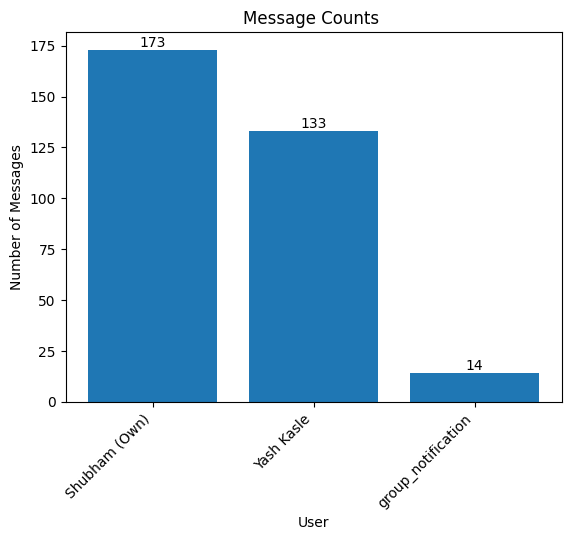

In [75]:
import matplotlib.pyplot as plt


# Plot a bar graph
plt.bar(message_counts.index, message_counts.values)
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title("Message Counts ")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Add count annotations on top of each bar
for i, count in enumerate(message_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [76]:
new_df1 = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'count':'percent'})
new_df1

,user,percent
0,Shubham (Own),54.06
1,Yash Kasle,41.56
2,group_notification,4.38


In [77]:
new_df2 = df["user"].value_counts().reset_index()
new_df2

,user,count
0,Shubham (Own),173
1,Yash Kasle,133
2,group_notification,14


In [78]:
merged_df = pd.merge(new_df1, new_df2, on='user')
merged_df

,user,percent,count
0,Shubham (Own),54.06,173
1,Yash Kasle,41.56,133
2,group_notification,4.38,14


In [79]:
words = []

for message in df["messages"]:
    words.extend(message.split())

In [80]:
import nltk
from nltk.corpus import stopwords

In [81]:
# remove all sticker/video/image/This "message was deleted.
ignore_text = ["\u200eimage omitted", "\u200eThis message was deleted." , "\u200evideo omitted" , "\u200esticker omitted"  ]
df_filtered = df[~df['messages'].isin(ignore_text)]
df_filtered

,date,user,messages,day,month,year,hour,min,sec
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
...,...,...,...,...,...,...,...,...,...
315,2026-01-30 12:27:00,Yash Kasle,5,30,January,2026,12,27,0
316,2026-01-31 17:16:00,Shubham (Own),Me santacruz la utarlo aata,31,January,2026,17,16,0
317,2026-02-01 18:17:00,Shubham (Own),Bhai me ghari pohochalo,1,February,2026,18,17,0
318,2026-02-01 18:26:00,Yash Kasle,Ok ok,1,February,2026,18,26,0


In [83]:
#Remove Stopwords
f = open('stopwords.txt','r')
stop_words = f.read()

words = []

for message in df_filtered["messages"]:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [84]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(50))

,0,1
0,<media,44
1,omitted>,44
2,aahe,42
3,haa,21
4,bhai,21
5,kay,20
6,hai,19
7,nahi,19
8,pan,19
9,na,14


In [85]:
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      320 non-null    datetime64[ns]
 1   user      320 non-null    object        
 2   messages  320 non-null    object        
 3   day       320 non-null    int32         
 4   month     320 non-null    object        
 5   year      320 non-null    int32         
 6   hour      320 non-null    int32         
 7   min       320 non-null    int32         
 8   sec       320 non-null    int32         
dtypes: datetime64[ns](1), int32(5), object(3)
memory usage: 16.4+ KB


In [87]:
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0


In [88]:
timeline = df.groupby(['year','month']).count()['messages'].reset_index()

In [89]:
timeline

,year,month,messages
0,2023,December,1
1,2023,July,1
2,2024,December,1
3,2024,January,7
4,2024,June,15
5,2024,November,9
6,2024,September,4
7,2025,April,6
8,2025,August,32
9,2025,December,3


In [90]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]))

In [91]:
timeline["time"] = time
timeline

,year,month,messages,time
0,2023,December,1,December-2023
1,2023,July,1,July-2023
2,2024,December,1,December-2024
3,2024,January,7,January-2024
4,2024,June,15,June-2024
5,2024,November,9,November-2024
6,2024,September,4,September-2024
7,2025,April,6,April-2025
8,2025,August,32,August-2025
9,2025,December,3,December-2025


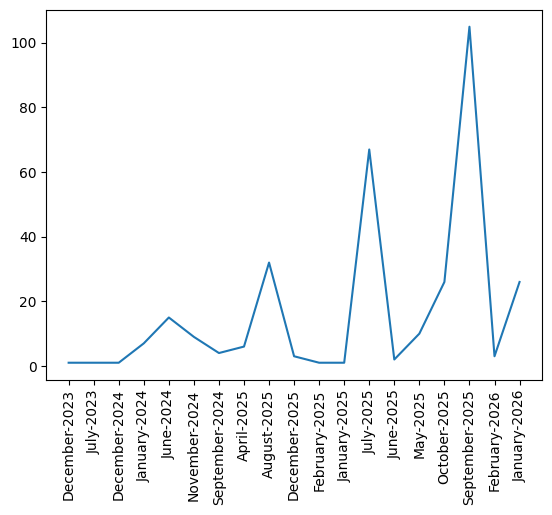

In [92]:
plt.plot(timeline["time"],timeline["messages"])
plt.xticks(rotation="vertical")
plt.show()

In [93]:
df["datee"] = df["date"].dt.date

In [94]:
daily_timeline = df.groupby("datee").count()["messages"].reset_index()

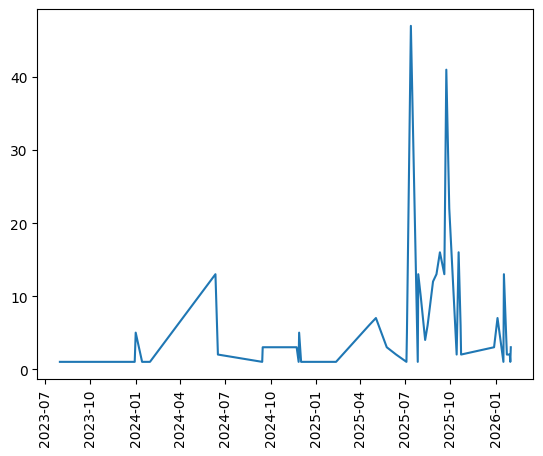

In [95]:
plt.plot(daily_timeline["datee"],daily_timeline["messages"])
plt.xticks(rotation="vertical")
plt.show()

In [96]:
df["day_name"] = df["date"].dt.day_name()
day_timeline = df["day_name"].value_counts().reset_index()
day_timeline

,day_name,count
0,Sunday,73
1,Saturday,59
2,Tuesday,58
3,Monday,57
4,Wednesday,48
5,Friday,18
6,Thursday,7


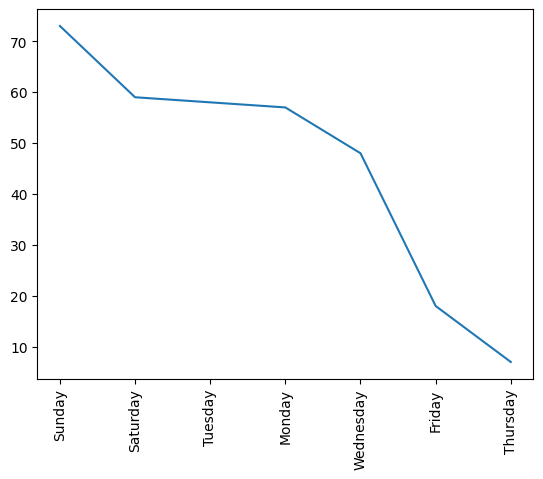

In [97]:
plt.plot(day_timeline["day_name"],day_timeline["count"])
plt.xticks(rotation="vertical")
plt.show()

In [98]:
df.head()

,date,user,messages,day,month,year,hour,min,sec,datee,day_name
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0,2023-07-31,Monday
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0,2023-12-30,Saturday
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday


In [99]:
df["hour"].unique()

array([22, 19, 21, 15, 13, 18, 14, 16, 11, 20, 12, 17, 23,  0],
      dtype=int32)

In [100]:
period = []

for hour in df[['day_name','hour']]['hour']:

    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

df["period"] = period
df.head()

,date,user,messages,day,month,year,hour,min,sec,datee,day_name,period
0,2023-07-31 22:49:00,group_notification,Messages and calls are end-to-end encrypted. O...,31,July,2023,22,49,0,2023-07-31,Monday,22-23
1,2023-12-30 22:15:00,group_notification,Shubham (Own):,30,December,2023,22,15,0,2023-12-30,Saturday,22-23
2,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday,19-20
3,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday,19-20
4,2024-01-01 19:46:00,Shubham (Own),<Media omitted>,1,January,2024,19,46,0,2024-01-01,Monday,19-20


/tmp/ipython-input-707736696.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(df.pivot_table(index="day_name",columns="period",values = "messages",aggfunc='count').fillna(0),cmap="crest")


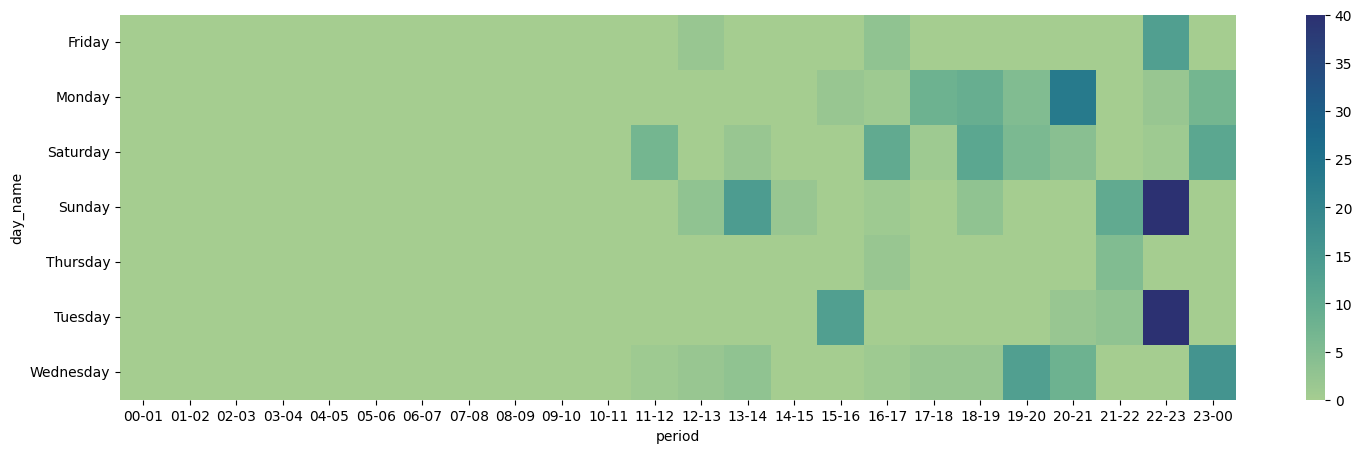

In [101]:
import seaborn as sns
plt.figure(figsize=(18,5))
df['period'] = pd.Categorical(df['period'], categories=[f"{i:02d}-{(i + 1) % 24:02d}" for i in range(24)], ordered=True)
sns.heatmap(df.pivot_table(index="day_name",columns="period",values = "messages",aggfunc='count').fillna(0),cmap="crest")
plt.yticks(rotation="horizontal")
plt.show()